#***Muhammad Furqan Rauf***
##**Exploratory Data Analysis Project - Student Depression Dataset**


In [3]:
import pandas as pd

In [7]:
# load the dataset
df = pd.read_csv('student_depression_dataset.csv')

#displaying the first 5 rows
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


#**Basic Data Exploration**


In [8]:
# Check number of rows and columns
print("Dataset Shape:", df.shape)

Dataset Shape: (27901, 18)


In [9]:
# Get column names and types
print("\nColumn Info:")
df.info()


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

In [10]:
# Check summary statistics for numerical columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


#**Data Cleaning**

##Handling Missing Values

In [18]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


##Fixing Data *Types*

In [24]:
# Check and print the actual column names
print(df.columns)

#Dropping 'id' column if it exists in the DataFrame
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
else:
    print("Column 'id' not found in DataFrame. Skipping drop operation.")

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
Column 'id' not found in DataFrame. Skipping drop operation.


In [12]:
# Convert categorical columns to category type
categorical_cols = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 'Family History of Mental Illness']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert 'Sleep Duration' to a proper format (removing quotes)
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "")

# Convert numeric columns if needed
df['CGPA'] = df['CGPA'].astype(float)


##Handling Inconsistent Data

In [17]:
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].replace({'yes': 1, 'no': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].replace({'yes': 1, 'no': 0})

#**Exploratory Data Analysis (EDA)**

##Check for Missing Values Again (Final Clean-up)
Before visualizing, confirm that there are no missing values:

In [25]:
print(df.isnull().sum())


Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


##Importing necessary libraries

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

##Box Plot


Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


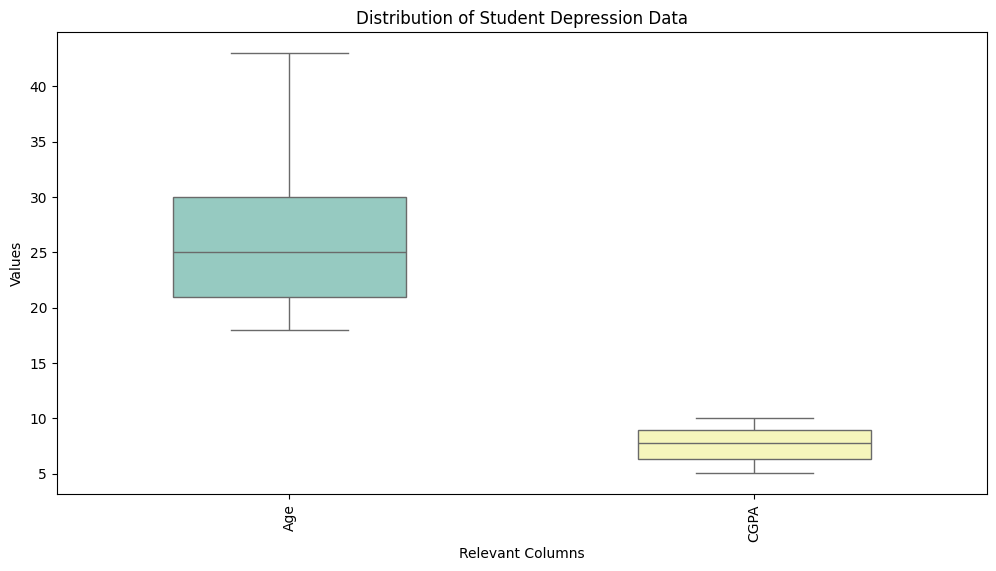

In [37]:
# Check the actual column names in your DataFrame
print(df.columns)

# Assuming the actual column name is 'Stress', fix the relevant_columns list
relevant_columns = ['Age', 'CGPA', 'Sleep Duration', 'Financial Stress']  # Replace 'Stress Level' with the correct column name

plt.figure(figsize=(12, 6))  # Adjust width and height as needed

sns.boxplot(data=df[relevant_columns],
            width=0.5,  # Adjust box width
            palette="Set3",  # Choose a color palette
            showfliers=False)  # Hide outlier points

plt.title("Distribution of Student Depression Data")
plt.xlabel("Relevant Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

#**Relations**

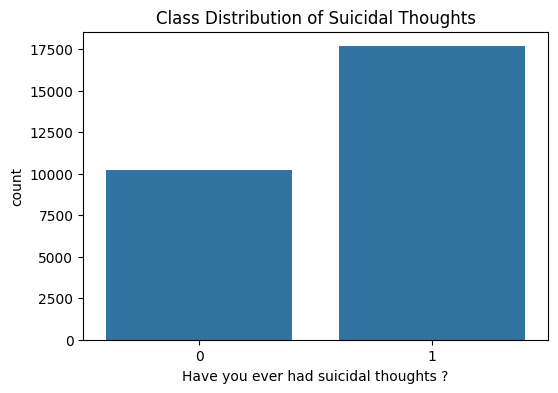

In [41]:
# Class Distribution of Suicidal Thoughts
plt.figure(figsize=(6,4))
sns.countplot(x=df['Have you ever had suicidal thoughts ?'])
plt.title("Class Distribution of Suicidal Thoughts")
plt.show()


##Correlation Heatmap (Numerical Features)
A heatmap shows how strongly variables are related.

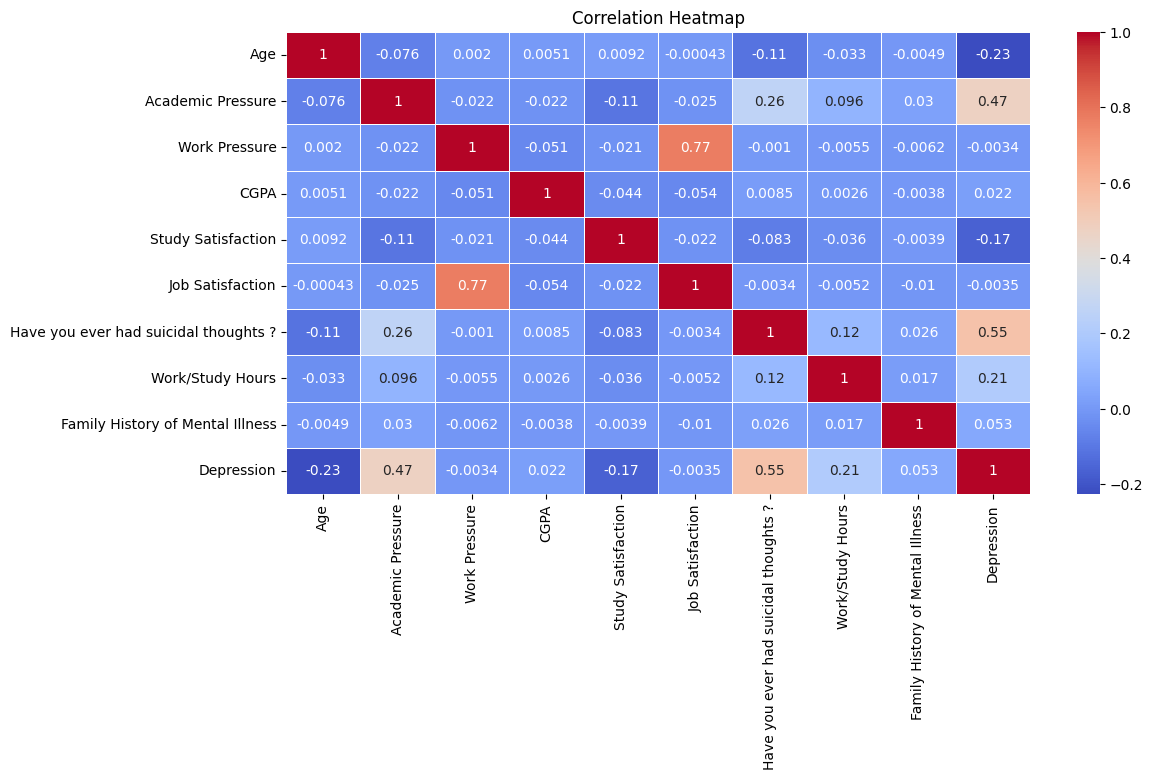

In [43]:
plt.figure(figsize=(12,6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##Relationship Between Family History & Suicidal Thoughts
We’ll check if a family history of mental illness increases suicidal thoughts.

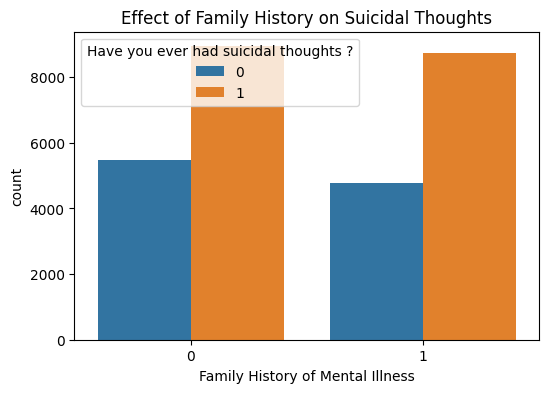

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Family History of Mental Illness'], hue=df['Have you ever had suicidal thoughts ?'])
plt.title("Effect of Family History on Suicidal Thoughts")
plt.show()


##Age Group vs Suicidal Thoughts
We can bin ages into groups and check their impact.

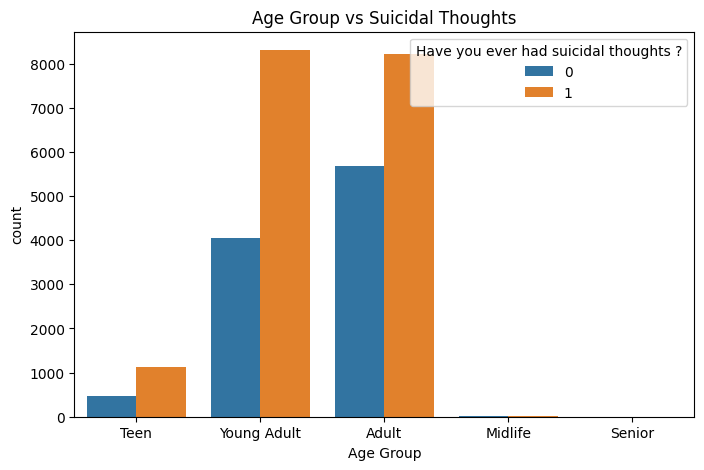

In [48]:
df['Age Group'] = pd.cut(df['Age'], bins=[10, 18, 25, 35, 50, 100], labels=["Teen", "Young Adult", "Adult", "Midlife", "Senior"])
plt.figure(figsize=(8,5))
sns.countplot(x=df['Age Group'], hue=df['Have you ever had suicidal thoughts ?'])
plt.title("Age Group vs Suicidal Thoughts")
plt.show()


##Relationship between Gender and Suicidal Thoughts

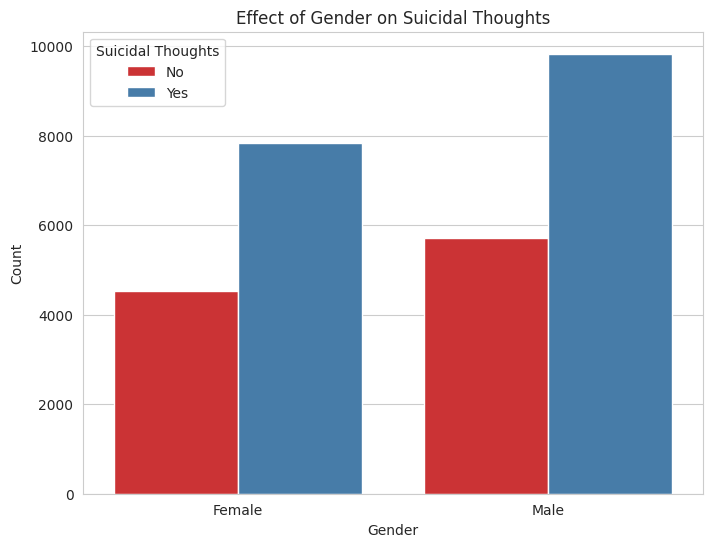

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", hue="Have you ever had suicidal thoughts ?", data=df, palette="Set1")

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Effect of Gender on Suicidal Thoughts")
plt.legend(title="Suicidal Thoughts", labels=["No", "Yes"])

# Show the plot
plt.show()


##Analyzing the Relationship Between Gender and CGPA

<ipython-input-64-8082f3f9e407>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='CGPA', data=df, palette="Set2")


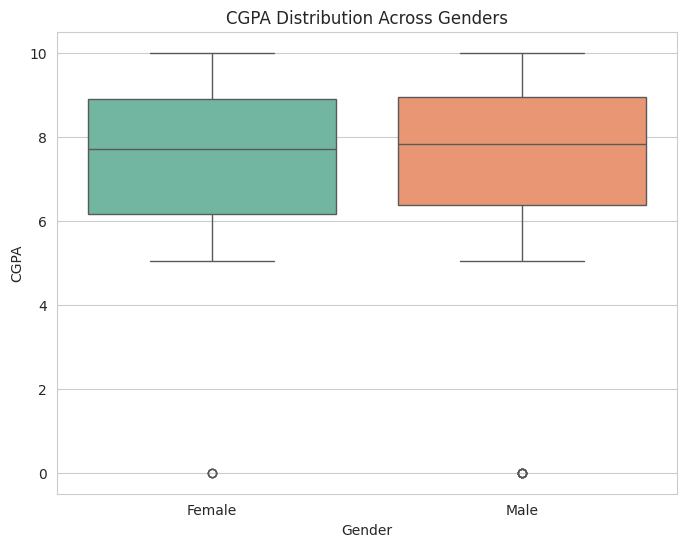

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='CGPA', data=df, palette="Set2")

plt.xlabel("Gender")
plt.ylabel("CGPA")
plt.title("CGPA Distribution Across Genders")
plt.show()


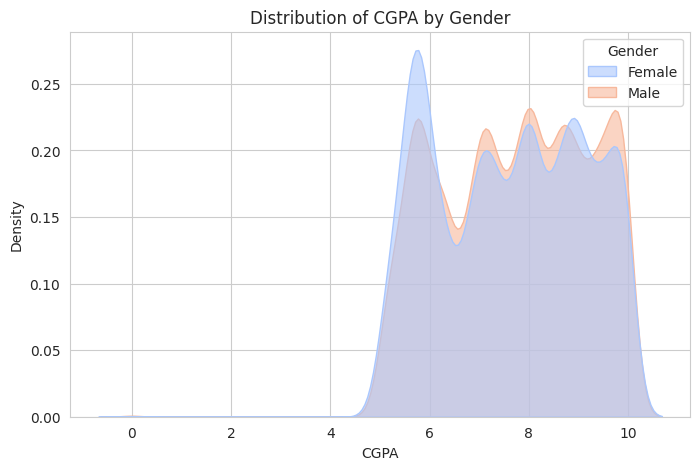

In [68]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='CGPA', hue='Gender', fill=True, common_norm=False, palette="coolwarm", alpha=0.6)

plt.xlabel("CGPA")
plt.ylabel("Density")
plt.title("Distribution of CGPA by Gender")
plt.show()


##**Bar Chart – Depression Count Across Degree Programs**

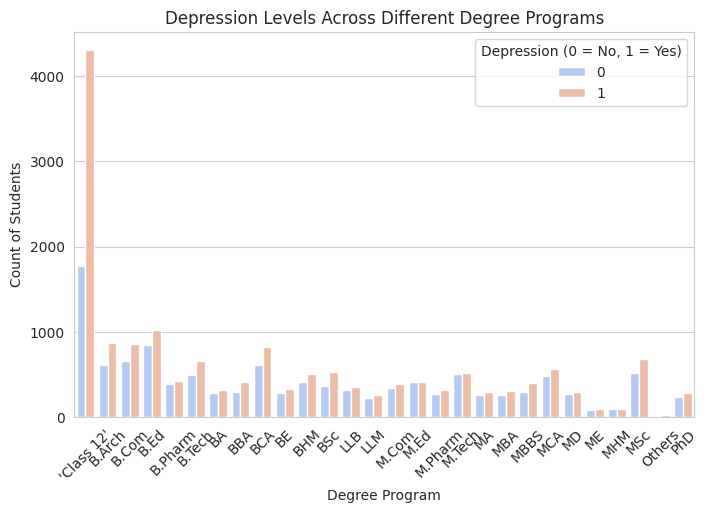

In [72]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Degree', hue='Depression', data=df, palette="coolwarm")

plt.xlabel("Degree Program")
plt.ylabel("Count of Students")
plt.title("Depression Levels Across Different Degree Programs")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.legend(title="Depression (0 = No, 1 = Yes)")
plt.show()
